<a href="https://colab.research.google.com/github/iorn121/ImageProcessing100Questions/blob/main/ImageProcessing11_20Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

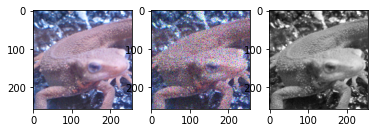

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray=cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1,3,1)
plt.imshow(img_orig)
plt.subplot(1,3,2)
plt.imshow(img_noise)
plt.subplot(1,3,3)
plt.imshow(img_gray, cmap="gray")
plt.show()

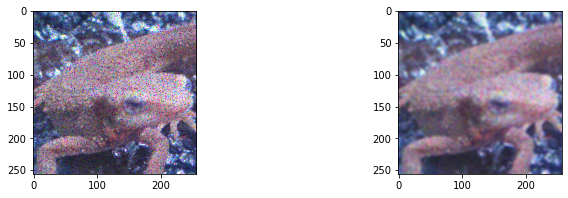

In [4]:
img_smoth=cv2.blur(img_noise, (5,5))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.subplot(1,2,2)
plt.imshow(img_smoth)
plt.show()

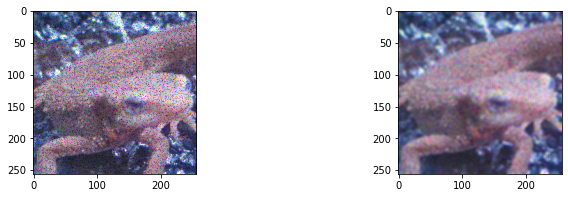

In [7]:
def filter_smooth(img, ksize=(3,3)):
  _img=img.copy().astype(np.float32)
  ksize_h,ksize_w=ksize

  h,w=img.shape[:2]
  pad_top, pad_bottom=ksize_h, ksize_h
  pad_left, pad_right = ksize_w, ksize_w

  _img=np.pad(_img,[(pad_top, pad_bottom), (pad_left, pad_right), (0,0)],"edge")
  out=np.zeros_like(_img)

  new_h,new_w=out.shape[:2]
  c = 1 if len(out.shape) == 2 else out.shape[2]

  for iy in range(new_h - ksize_h):
    for ix in range(new_w-ksize_w):
      for ic in range(c):
        out[iy][ix][ic]=np.mean(_img[iy:iy+ksize_h,ix:ix+ksize_w,ic])
  out = out[pad_top:pad_top+h,pad_left:pad_left+w]
  return np.clip(out,0,255).astype(np.uint8)

img_smoth=filter_smooth(img_noise, (5,5))
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.imshow(img_noise)
plt.subplot(1,2,2)
plt.imshow(img_smoth)
plt.show()